In [1]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 588.3 MB 6.8 kB/s 
     |████████████████████████████████| 40 kB 6.5 MB/s 
     |████████████████████████████████| 189 kB 66.0 MB/s 
     |████████████████████████████████| 16.2 MB 44.3 MB/s 
     |████████████████████████████████| 145 kB 64.8 MB/s 
     |████████████████████████████████| 8.3 MB 46.3 MB/s 
     |████████████████████████████████| 237 kB 66.5 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 
     |████████████████████████████████| 6.0 MB 45.0 MB/s 
     |████████████████████████████████| 439 kB 58.7 MB/s 
     |████████████████████████████████| 1.7 MB 50.3 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
   

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
train_path = '/content/drive/MyDrive/DATASET/TRAIN'
test_path = '/content/drive/MyDrive/DATASET/TEST'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/DATASET/TRAIN/*')

In [ ]:
len(folders)

5

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 634 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/TEST',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 361 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(
    training_set, 
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
40/40 [==============================] - 41s 914ms/step - loss: 0.8198 - accuracy: 0.7192 - val_loss: 0.2491 - val_accuracy: 0.9058
Epoch 2/10
40/40 [==============================] - 37s 924ms/step - loss: 0.1436 - accuracy: 0.9653 - val_loss: 0.0852 - val_accuracy: 0.9723
Epoch 3/10
40/40 [==============================] - 32s 808ms/step - loss: 0.0737 - accuracy: 0.9795 - val_loss: 0.0743 - val_accuracy: 0.9751
Epoch 4/10
40/40 [==============================] - 31s 793ms/step - loss: 0.0470 - accuracy: 0.9921 - val_loss: 0.0785 - val_accuracy: 0.9751
Epoch 5/10
40/40 [==============================] - 32s 809ms/step - loss: 0.0248 - accuracy: 0.9984 - val_loss: 0.0678 - val_accuracy: 0.9778
Epoch 6/10
40/40 [==============================] - 32s 809ms/step - loss: 0.0191 - accuracy: 0.9984 - val_loss: 0.0526 - val_accuracy: 0.9834
Epoch 7/10
40/40 [==============================] - 33s 824ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9834

In [ ]:
from keras.models import load_model
model.save('CNN_VGG.h5')

In [ ]:
import tensorflowjs 

In [ ]:
!tensorflowjs_converter --input_format keras \
                       /content/CNN_VGG.h5 \
                       /content

I converted the model and its weights from .h5 extension to .json and .bin extension repectively inorder to deploy the model in a web application using JavaScript.

To do predictions on the trained model I need to load the best saved model and pre-process the image and pass the image to the model for output.

from keras.preprocessing import imageimg = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)from keras.models import load_model
saved_model = load_model("CNN_VGG.h5")output = saved_model.predict(img)

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('CNN_VGG.h5')
img = image.load_img('/content/drive/MyDrive/DATASET/TEST/Goddess/00000008.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

[[0. 1. 0. 0. 0.]]


In [ ]:
model.evaluate(training_set), model.evaluate(test_set)

23/23 [==============================] - 13s 559ms/step - loss: 0.0594 - accuracy: 0.9861


([0.010837688110768795, 1.0], [0.059386495500802994, 0.9861496090888977])

In [ ]:
y_val_org = []
for i in range( test_set.__len__() ):
    y_val_org.extend(
        test_set.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [ ]:
y_val_org


array([2, 4, 4, 4, 1, 2, 0, 0, 3, 2, 0, 3, 2, 4, 2, 1, 1, 0, 4, 2, 4, 3,
       3, 2, 4, 3, 2, 0, 1, 3, 0, 2, 2, 4, 0, 2, 0, 4, 2, 1, 4, 2, 4, 4,
       0, 2, 1, 4, 2, 1, 4, 2, 1, 3, 0, 2, 0, 0, 1, 3, 2, 0, 2, 4, 0, 0,
       2, 2, 4, 1, 4, 2, 1, 2, 3, 1, 2, 2, 4, 4, 3, 1, 4, 0, 2, 3, 1, 1,
       0, 1, 4, 0, 2, 1, 2, 2, 2, 2, 4, 2, 0, 2, 4, 0, 3, 2, 2, 2, 2, 2,
       0, 1, 3, 0, 0, 2, 0, 0, 0, 2, 4, 1, 1, 3, 4, 3, 0, 2, 4, 4, 4, 2,
       2, 0, 0, 2, 1, 3, 2, 2, 2, 0, 2, 3, 2, 1, 3, 0, 3, 3, 4, 2, 1, 4,
       2, 3, 0, 1, 0, 0, 3, 3, 0, 1, 1, 2, 3, 2, 4, 4, 0, 1, 1, 1, 2, 2,
       1, 0, 1, 4, 4, 4, 4, 4, 4, 0, 0, 4, 3, 3, 2, 3, 4, 4, 1, 0, 0, 2,
       0, 4, 4, 4, 2, 4, 0, 2, 3, 3, 4, 3, 1, 0, 0, 3, 2, 4, 1, 1, 4, 2,
       3, 2, 1, 2, 0, 2, 1, 0, 1, 3, 0, 4, 0, 1, 1, 1, 4, 4, 2, 4, 4, 0,
       0, 1, 2, 3, 4, 2, 2, 0, 3, 0, 1, 0, 3, 2, 3, 0, 4, 2, 4, 2, 4, 4,
       2, 2, 2, 1, 4, 0, 1, 4, 3, 3, 3, 4, 1, 3, 2, 0, 0, 4, 1, 4, 0, 0,
       3, 3, 4, 3, 2, 0, 3, 0, 1, 2, 1, 3, 2, 1, 1,

In [ ]:
ypreds = model.predict(test_set)
ypreds = np.argmax(ypreds, axis=1)
ypreds

array([2, 4, 4, 4, 1, 0, 0, 0, 4, 2, 0, 3, 2, 4, 2, 1, 1, 0, 4, 2, 4, 3,
       3, 2, 4, 3, 2, 0, 1, 3, 0, 2, 2, 4, 0, 2, 0, 4, 2, 1, 4, 2, 4, 4,
       0, 2, 1, 4, 2, 1, 1, 2, 1, 3, 0, 2, 0, 0, 1, 3, 2, 0, 2, 4, 0, 0,
       2, 2, 4, 1, 4, 2, 1, 2, 3, 1, 2, 2, 4, 4, 3, 1, 4, 0, 2, 3, 1, 1,
       0, 1, 4, 0, 2, 1, 2, 2, 2, 2, 4, 2, 0, 2, 4, 0, 3, 2, 2, 2, 2, 2,
       0, 1, 3, 0, 0, 2, 0, 0, 0, 2, 4, 1, 1, 3, 4, 3, 0, 2, 4, 4, 4, 2,
       2, 0, 0, 2, 1, 3, 2, 2, 2, 0, 2, 3, 2, 1, 3, 0, 3, 3, 4, 2, 1, 4,
       2, 3, 0, 1, 0, 0, 3, 3, 0, 1, 1, 2, 3, 2, 4, 4, 0, 1, 1, 1, 2, 2,
       1, 0, 1, 4, 4, 4, 4, 4, 4, 0, 0, 4, 3, 3, 2, 3, 4, 4, 1, 0, 0, 2,
       0, 4, 4, 4, 2, 4, 0, 2, 3, 3, 4, 3, 1, 0, 0, 3, 2, 2, 1, 1, 4, 2,
       3, 2, 1, 2, 0, 2, 1, 0, 1, 3, 0, 4, 0, 1, 1, 1, 4, 4, 2, 4, 4, 0,
       0, 1, 2, 3, 4, 2, 2, 0, 3, 0, 1, 0, 3, 2, 3, 0, 4, 2, 4, 0, 4, 4,
       2, 2, 2, 1, 4, 0, 1, 4, 3, 2, 3, 4, 1, 3, 2, 0, 0, 4, 1, 4, 0, 0,
       3, 3, 4, 3, 2, 0, 3, 0, 4, 2, 1, 3, 2, 1, 1,

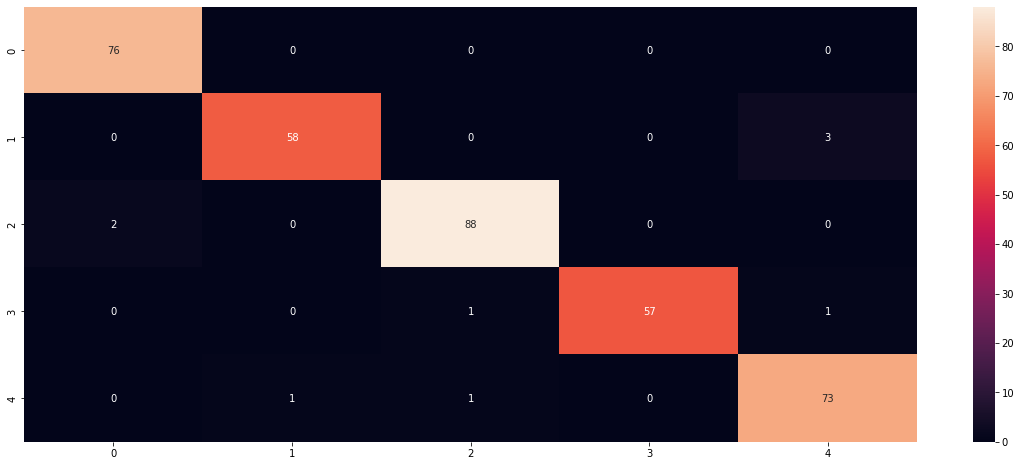




              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       0.98      0.95      0.97        61
           2       0.98      0.98      0.98        90
           3       1.00      0.97      0.98        59
           4       0.95      0.97      0.96        75

    accuracy                           0.98       361
   macro avg       0.98      0.97      0.97       361
weighted avg       0.98      0.98      0.98       361



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_val_org, ypreds)

plt.figure(figsize=(20,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_val_org, ypreds))